In [7]:
import pandas as pd
import numpy as np 
#import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/Users/apple/Downloads/test_msft_goog_aapl (1).csv')

In [5]:
# Pivot the table to get the wide format
# index='date': The 'date' column will become the new index.
# columns='symbol': The unique values in 'symbol' (AAPL, MSFT, GOOG) will become the new columns.
# values='close': The 'close' column will provide the values for the new columns.

close_prices_df = df.pivot(index='Date', columns='Ticker', values='Close')  #newdf

# Let's rename the columns for clarity as you requested
close_prices_df.columns = [f'{col}_close' for col in close_prices_df.columns]


print("\n--- Pivoted DataFrame with Closing Prices ---")
print(close_prices_df.head())


--- Pivoted DataFrame with Closing Prices ---
            AAPL_close  GOOG_close  MSFT_close
Date                                          
2020-04-16   69.573654   62.875698  169.458908
2020-04-17   68.629631   63.860031  170.952133
2020-04-20   67.205086   63.031956  167.563705
2020-04-21   65.127762   60.530304  160.633713
2020-04-22   67.003677   62.862751  166.089661


In [10]:
# 1. Define the name of the file you want to save.
output_filename = 'pivoted-stock-data.csv'

# 2. Use the .to_csv() method on your new DataFrame.
# We use index=True because the 'date' is our index, and we need to save it.
close_prices_df.to_csv(output_filename)

print(f"Successfully saved the pivoted data to '{output_filename}'")

Successfully saved the pivoted data to 'pivoted-stock-data.csv'


            AAPL_close  GOOG_close  MSFT_close
AAPL_close    1.000000    0.889128    0.922561
GOOG_close    0.889128    1.000000    0.930248
MSFT_close    0.922561    0.930248    1.000000


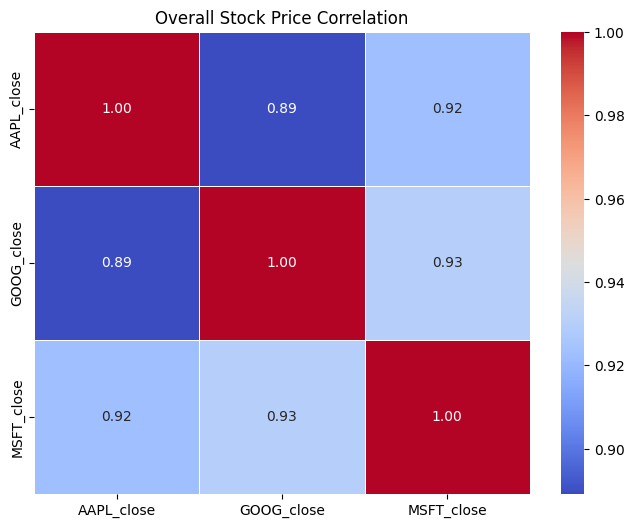

In [8]:
# Calculate the correlation matrix
correlation_matrix = close_prices_df.corr()

print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Overall Stock Price Correlation')
plt.show()

#Scale (1 to -1): The color bar shows the correlation coefficient.
# +1 (Dark Red): Perfect positive correlation. When one stock goes up, the other goes up.
# 0 (White): No correlation. The movements are random with respect to each other.
# -1 (Dark Blue): Perfect negative correlation. When one stock goes up, the other goes down.



--- Rolling Correlation Analysis ---

Correlation for the last 5 days (1 Week):
            AAPL_close  GOOG_close  MSFT_close
AAPL_close    1.000000    0.819102    0.663874
GOOG_close    0.819102    1.000000    0.916788
MSFT_close    0.663874    0.916788    1.000000


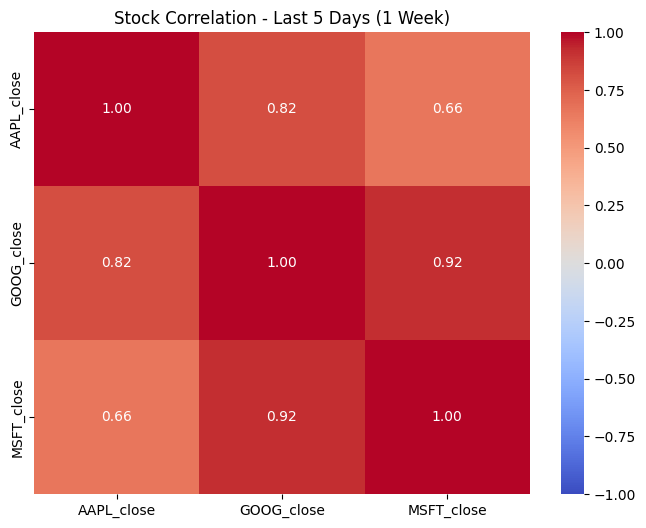


Correlation for the last 14 days (14 Market Days):
            AAPL_close  GOOG_close  MSFT_close
AAPL_close    1.000000    0.694278    0.620064
GOOG_close    0.694278    1.000000    0.967582
MSFT_close    0.620064    0.967582    1.000000


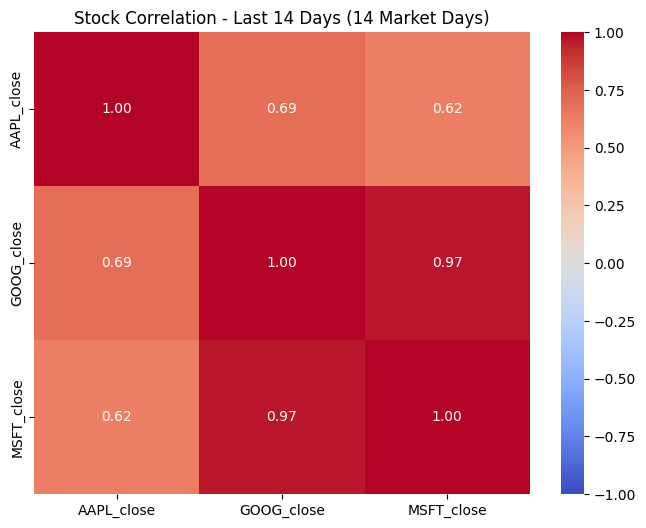


Correlation for the last 22 days (22 Market Days (approx. 1 Month)):
            AAPL_close  GOOG_close  MSFT_close
AAPL_close    1.000000    0.745413    0.715189
GOOG_close    0.745413    1.000000    0.916643
MSFT_close    0.715189    0.916643    1.000000


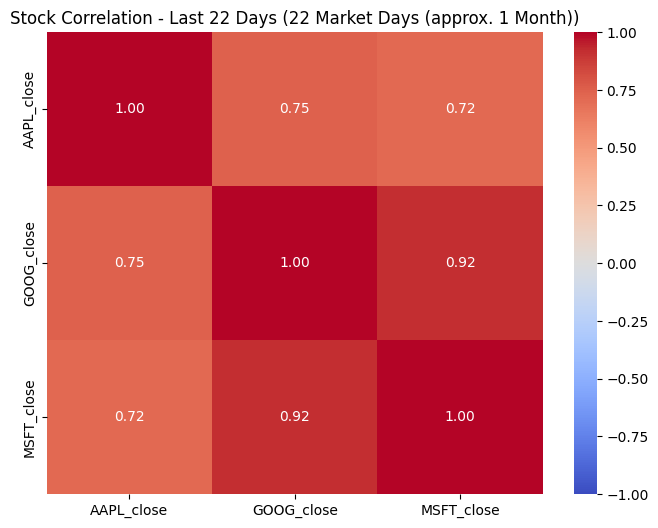

In [9]:
# Define the time windows (in market days)
windows = {
    '1 Week': 5,
    '14 Market Days': 14,
    '22 Market Days (approx. 1 Month)': 22
}

print("\n--- Rolling Correlation Analysis ---")

# We will look at the correlation as of the last day in the dataset for each window
last_date = close_prices_df.index.max() #most recent date in the data 

for period_name, window_size in windows.items():
    # Calculate rolling correlation
    # The result is a multi-index DataFrame, which is a bit complex
    rolling_corr = close_prices_df.rolling(window=window_size).corr()

    # We extract the correlation matrix for the last day
    last_day_corr = rolling_corr.loc[last_date]

    print(f"\nCorrelation for the last {window_size} days ({period_name}):")
    print(last_day_corr)

    # Visualize it
    plt.figure(figsize=(8, 6))
    sns.heatmap(last_day_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(f'Stock Correlation - Last {window_size} Days ({period_name})')
    plt.show()

In [ ]:
# GOOG -> MSFT -> stable trend -> easy predictions 

# but GOOG - MSFT overall trend 30 years is -0.93 
# AAPL - GOOGL overall trend -> -0.89 
# AAPl - GOOGL periodic trend 69-80 values -> stable but very slight 
# AAPL - MSFT same slightness stability only -> not very indicative of predictive trending 